<a href="https://colab.research.google.com/github/ShravyaMalogi/Machine_Learning/blob/main/09_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Create a dictionary with the data
data = {
    'price': [300000, 450000, 200000, 500000, 320000, 310000, 600000, 250000, 280000, 450000],
    'bedrooms': [3, 4, 2, 5, 3, 3, 4, 2, 3, 4],
    'bathrooms': [2, 3, 1, 4, 2, 2, 3, 1, 2, 3],
    'sqft': [1500, 2000, 800, 2500, 1600, 1700, 2200, 1000, 1400, 2100],
    'neighborhood': ['Suburban', 'Urban', 'Rural', 'Urban', 'Suburban', 'Rural', 'Urban', 'Rural', 'Suburban', 'Suburban']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('house_prices.csv', index=False)


Mean Squared Error: 11450000000.0
R-squared Score: -0.5847750865051904

🌳 Decision Tree Visualization (Matplotlib):


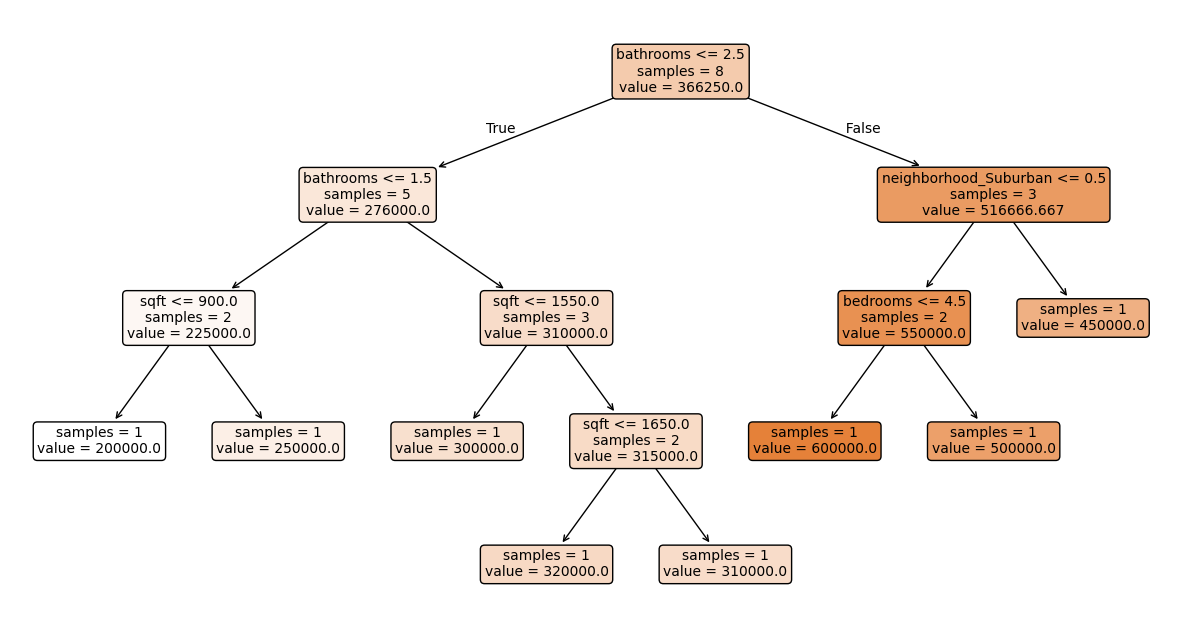


🌳 Decision Tree Visualization (Graphviz):


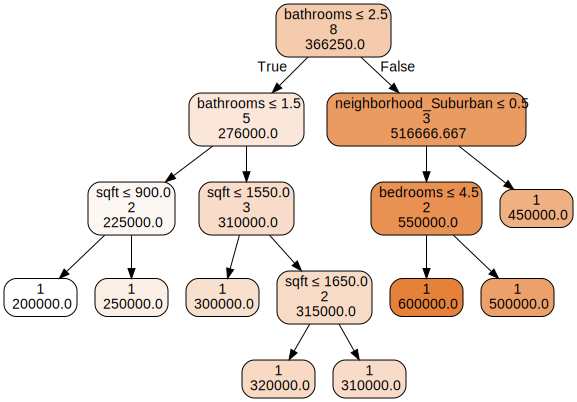

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('house_prices.csv')

# Step 2: Handle missing values (if any)
df = df.dropna()

# Step 3: Encode categorical variables ('neighborhood')
df = pd.get_dummies(df, columns=['neighborhood'], drop_first=True)

# Step 4: Define features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Step 8: Clean Decision Tree Visualization with Heading
plt.figure(figsize=(15, 8))
plt.title("📊 Decision Tree Visualization (Matplotlib)", fontsize=14, fontweight='bold', pad=15)
print("\n🌳 Decision Tree Visualization (Matplotlib):")
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, impurity=False, proportion=False, fontsize=10)
plt.show()

# Step 9: Alternative Graphviz Display with Centered Output
print("\n🌳 Decision Tree Visualization (Graphviz):")
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns,
    filled=True, rounded=True, special_characters=True,
    impurity=False, label='none'  # Ensures a clean tree
)

# Create and display the centered Graphviz tree
graph = graphviz.Source(dot_data)
display(graph)